# **Interpolación de Lagrange**

Explique el método de interpolación de Lagrange y, con ejemplos, por qué es útil en ciencias básicas e ingeniería. Las aplicaciones pueden ser fundamentales o prácticas. Asuma que los estudiantes saben usar numpy y matplotlib, pero no scipy, y que además ya vieron cursos básicos de matemáticas. Para ilustrar los conceptos, proponga algún problema sencillo de su
preferencia y resuélvalo numéricamente usando librerías de interpolación de scipy. El sistema debe ser bien comportado y ejemplificar alguna aplicación, así sea menor, en matemáticas, ciencia o ingeniería. Finalmente, explique bajo cuáles circunstancias falla este método de interpolación y cómo puede ser mejorado (aquí puede discutir otros métodos de interpolación más avanzados).


---



---



El objetivo de este notebook es explicar el metódo de interpolación de Lagrange.

**Contenido**

1. Explicación teórica
2. Aplicación en Python
3. *Ejemplo:* Movimiento con aceleración no lineal
5. Conclusión: bajo qué circunstancias falla y como puede ser mejorado



## 1. Fundamentación teórica

En muchas situaciones de física e ingeniería tenemos un conjunto de datos pero queremos encontrar una interpolación de los mismos, es decir, una relación matemática que estime los datos intermedios que no conocemos. Para esto, aparecen las técnicas de interpolación entre las cuales se encuentra la *interpolación de Lagrange*, la cual tiene ventajas computacionales muy importantes pues pertenece a la categoría de interpolación polinómica.

Se parte de un conjunto de datos con $n$ pares diferentes $(x_i,y_i)$ que se utilizarán para interpolar un polinomio cuyo grado será a lo sumo $n-1$. Para definir el polinomio de Lagrange se debe primero definir la base de Lagrange de dimensión $n$ donde cada elemento estará dado por:

$$l_k(x) = \frac{x-x_1}{x_k-x_1} ... \frac{x-x_n}{x_k-x_n} = \prod_{1\leq j \leq n \\ j \neq k} \frac{x-x_j}{x_k-x_j}$$

Así, el polinomio de Lagrange es una combinación lineal de esta base cuyos coeficientes son los $y_i$,

$$L(x) = \sum_{i=1}^{n}y_il_i(x)$$

## 2. Aplicación en Python

Ahora veamos como podemos utilizar la interpolación de Lagrange utilizando la librería de SciPy. Primero, debemos importar la función utilizando `from scipy.interpolate import lagrange` así como las libreras de NumPy y Matplotlib.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [21]:
from scipy.interpolate import lagrange

Definamos un conjunto de $n=4$ datos $(x_i,y_i)$

In [22]:
x = np.array([-0.7,-1.7,1.3,2.5])
y = np.array([0.78, -0.13, 0.26, -0.89])

Con la librería, calculamos la función o polinomio interpolado

In [23]:
lagrange_polynomial = lagrange(x,y)

Podemos ver que este polinomio tiene 4 coeficientes, es decir es de grado 3 como se esperaba. Estos coeficientes están dados por:

In [24]:
lagrange_polynomial.coef

array([ 0.04089782, -0.3450124 , -0.10493279,  0.88963108])

También podemos visualizar el resultado de nuestra interpolación

Text(0.5, 1.0, 'Interpolación de Lagrane con $n=4$ puntos')

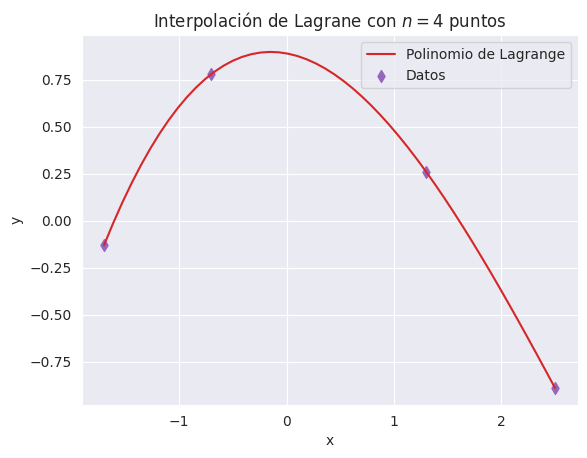

In [35]:
t = np.linspace(min(x),max(x))
f = lagrange_polynomial(t)

fig,ax = plt.subplots()
ax.plot(t,f,c='tab:red',label='Polinomio de Lagrange')
ax.scatter(x,y,marker='d',c='tab:purple', label='Datos')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'Interpolación de Lagrane con $n=4$ puntos')



## 3. Ejemplo: Aceleración no lineal

Ahora veamos un ejemplo de aplicación de interpolación de Lagrange a la cinemática en una dimensión.

Suponga que en un laboratorio, se diseña una pista para que una pelota de masa $m=10kg$ pueda experimentar aceleraciones no lineales. En diferentes instantes de tiempo, se anota la posición de la pelota y los resultados están en las variables $t_{pelota},x_{pelota}$ a continuación. A partir de esa información encuentre:

1. la velocidad inicial de la pelota
2. la fuerza inicial que experimenta la pelota
3. la aceleración de la pelota en $t=2.3s$ y en $t=3.5s$



In [38]:
t_pelota = np.array([0,1,2,3,4,5,6,7,8,9,10])
x_pelota = np.array([-3.72,-4.56,-5.43,-4.12,-2.98,-1.45,-0.94,0.35,1.56,2.34,1.78])

Primero, encontramos la interpolación de Lagrange utilizando SciPy y sus coeficientes

In [39]:
lagrange_pelota = lagrange(t_pelota,x_pelota)

In [40]:
lagrange_pelota.coef

array([-4.38960538e-05,  2.20878803e-03, -4.76736938e-02,  5.76958581e-01,
       -4.29451834e+00,  2.02765964e+01, -6.03200295e+01,  1.07996474e+02,
       -1.03617735e+02,  3.85877619e+01, -3.72000000e+00])

Note que $-4.38960538\times10^{-5}$ es el coeficiente del término $t^{10}$ en el polinomio.

1. La velocidad inicial de la pelota puede ser encontrada evaluando la primera derivada de este polinomio en $t=0$ puesto que $v=\frac{dx}{dt}$.

Así pues, adicional a la interpolación de Lagrange podemos utilizar el paquete `polyder` de NumPy

In [49]:
# Derivada de orden m=1 del polinomio de lagrange, note que para utilizar esta función debemos invertir los coeficientes
velocidad_pelota = np.polyder(np.poly1d(lagrange_pelota.coef),m=1) 
velocidad_pelota

poly1d([-4.38960538e-04,  1.98790923e-02, -3.81389550e-01,  4.03871007e+00,
       -2.57671101e+01,  1.01382982e+02, -2.41280118e+02,  3.23989423e+02,
       -2.07235469e+02,  3.85877619e+01])

In [50]:
velocidad_pelota(0)

38.58776190476193

La pelota experimenta una velocidad inicial de $38.59m/s$.

2. La fuerza inicial de la pelota está dada por la segunda derivada de su posición multiplicada por la masa puesto que 
$$F=ma = m\frac{d^2x}{dt^2}$$

In [51]:
aceleracion_pelota = np.polyder(np.poly1d(lagrange_pelota.coef),m=2)
aceleracion_pelota 

poly1d([-3.95064484e-03,  1.59032738e-01, -2.66972685e+00,  2.42322604e+01,
       -1.28835550e+02,  4.05531927e+02, -7.23840354e+02,  6.47978846e+02,
       -2.07235469e+02])

In [52]:
m=10
fuerza_pelota = m*aceleracion_pelota
fuerza_pelota(0)

-2072.354690476188

La pelota experimenta una fuerza inicial de $-2072.35 N$

3. La aceleración se puede evaluar en los tiempos pedidos usando

In [54]:
aceleracion_pelota(2.3)

-1.7294740320803896

In [55]:
aceleracion_pelota(3.5)

1.25503166448064